#  Microplastics and Biomagnification

$\textbf{Microplastics}$ are tiny pieces of plastic formed through degradation of plastic waste that can end up being consumed by fish and other organisms. Since plastics are not easily digestible by most organisms, they tend to stay in the gut of many organisms for a much longer time than natural food. In this way, they are able to enter the food web and accumulate within the bodies of organisms.

<img src="microplastics.png" width="500px"></img>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\textbf{Figure 1}$ Microplastics (ref. 7)


As organisms higher in the food chain consume lower-levelled organisms, they end up consuming the microplastics that have accumulated in their prey. These unnatural buildups of toxins such as microplastics in organisms is called $\textbf{biomagnification}$. These plastics in higher concentrations can negatively impact the health of the organisms they consume and sometimes can lead to death of the organism altogether. See reference 1 for more details.

<img src="biomagnification1_med.jpeg" width="500px"></img>
$\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\textbf{Figure 2}$ Biomagnification of toxins going up the food chain (ref. 6)


# Modeling the Effect of Boba Consumption on Microplastics in Organisms

Here, we introduce a (quite crude, to be honest) model of how YOUR boba consumption can impact the natural amount of plastics in an organism.

$\textbf{NOTE:}$ Much of this model is based off of the formulas and literature values found in ref. 2, with some added assumptions/estimates made by us to make it tractable. Note that this is not meant to be a rigorous, scientifically verified model of microplastics—its main goal is to show how one might model the negative effects of plastic usage and gives an idea of how we might educate others on the negative effects of an individual's plastic usage.

We want to introduce some terminology that will help us talk about biomagnification in organisms. We define the steady-state $\textbf{biomagnification factor}$ ($\textbf{BMF}$), which is a ratio between what can be though of as the concentration of a specific compound (such as some microplastic) in an organism versus in the natural diet of that organism. Therefore, a higher BMF implies a more unnatural amount of microplastics within an organism than there should be. The formula to calculate BMF for a given organism is 

$$BMF_{max}=\frac{1}{\gamma + \beta}$$

where $\beta\approx 1-\alpha_Z$ represents the driving forces for biomagnfication and $\gamma$ represents the forces that are counteracting biomagnification. To see a formal derivation and/or further information on BMFs, check out ref. 3.

$\alpha_Z$ represents the digestive efficiency of a given chemical for a given organism and is a function of the diet of the organism, which changes as a function of the concentration of microplastics in the vicinity of the organism. It can be modeled by the following equation:

$$\alpha_Z=\frac{\sum_i\alpha_i\phi_{i,D}Z_i}{\sum_i\phi_{i,D}Z_i}$$

where $\alpha_i$ is the dry-matter digestibility of each biochemical constituent $i$ of the diet of the consumer, $\phi_{i,D}$ is the fraction of the diet for biochemical component $i$, and $Z_i$ is the effective concentration of component $i$. We take all values for $\phi_{i,D}$ and $Z_i$ from ref. 3 and modify the given values of $\alpha_i$ from ref. 3.

While the specific relationship between concentration and diet is hard to determine, we make the \**ahem*\* very large assumption that the digestive efficiency of nutrients is proportional to the concentration of microplastics and modify the given values for $\alpha_i$ accordingly.

Finally, we will be making the assumption that the microplastics are spread evenly across the surface of the Great Pacific Garbage Patch (GPGP), which has a surface area of $1600000 \ \text{km}^2$, and that a specific percentage of our plastic waste will be entering the GPGP based on estimates of the ultimate fate of plastic waste.

We will be calculating BMF values for three marine organisms—the marine mysid (crustacean), squid, and dugong.


In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [83]:
#Dugong Parameters
#du_beta = 0.01
du_gamma = 0.01
du_a = np.array((0.96, 0.96, 0.96)) #protein, carbohydrates, lipids
du_phi = np.array((0.16, 0.61, 0.01))

#Squid Parameters
#sq_beta = 0.08
sq_gamma = 0.12
sq_a = np.array((0.95, 0, 0.85)) #carb a value not known
sq_phi = np.array((0.66, 0.05, 0.14))

#Marine Mysid Parameters
#th_beta = 0.08
th_gamma = 0.12
th_a = np.array((0.85, 0.62, 0.96))
th_phi = np.array((0.5, 0, 0.31))

z = np.array((0.05, 0.1, 1))

lam = 1e5 #tunable, unknown parameter. I cherry-picked this value to get good results. 
            #there is no scientific/logical basis for choosing this value. The purpose
            #of this exercise is to explain how one might use a model to connect personal
            #actions to real-life impact. If I were able to create an accurate, plausible
            #model of microplastics and biomagnification by connecting through boba straws,
            #I would have a PhD in mathematical modeling. :>) 
            #ALSO! FEEL FREE TO TUNE THIS PARAMETER TO GET DIFFERENT END RESULTS!
        

Let's calculate the amount of plastic waste from boba consumption students at Cal produce based on your estimate of how often the average Berkeley student consumes boba.

In [84]:
avg_boba_per_month = 5 #TODO: INPUT YOUR ESTIMATE FOR NUMBER OF BOBAS CONSUMED PER MONTH PER PERSON
vol_plastic_per_straw = 0.016 #liters/straw
num_students = 43000

plastic_waste_per_year = num_students * avg_boba_per_month * vol_plastic_per_straw * 12
ocean_plastic_per_year = 0.03 * plastic_waste_per_year #3% of plastic waste goes to ocean (ref. 1)

print("Cal students would account for {} liters of plastic waste per year, with {} liters of plastic going to the ocean, given your estimate.".format(int(plastic_waste_per_year), int(ocean_plastic_per_year)))




Cal students would account for 41280 liters of plastic waste per year, with 1238 liters of plastic going to the ocean, given your estimate.


In [85]:
gpgp_surf_area = 1.6e12 #square meters (ref. 1)
gpgp_cur_plastic = 7.9e7/0.92 #kilograms plastic in gpgp (ref. 1)/avg_plastic_density assume avg of 0.92 g/ml plastic density
gpgp_cur_plastic_conc = gpgp_cur_plastic/gpgp_surf_area
gpgp_new_plastic = gpgp_cur_plastic + 0.29 * ocean_plastic_per_year #assuming that 29% of ocean plastic waste goes to GPGP (ref. 1)
gpgp_new_plastic_conc = gpgp_new_plastic/gpgp_surf_area
delta_gpgp_plastic_conc = gpgp_new_plastic_conc - gpgp_cur_plastic_conc

print(gpgp_cur_plastic)
print(gpgp_new_plastic)
print(gpgp_cur_plastic_conc)
print(gpgp_new_plastic_conc)
print("Change in plastic concentration in GPGP in a year due to Cal students drinking boba: ", delta_gpgp_plastic_conc, "L/m^2")


85869565.2173913
85869924.3533913
5.366847826086956e-05
5.366870272086957e-05
Change in plastic concentration in GPGP in a year due to Cal students drinking boba:  2.2446000000488726e-10 L/m^2


Old Dugong BMF Value:  19.99999999999994
Old Squid BMF Value:  3.6319118547235254
Old Marine Mysid BMF Value:  5.944986690328299
New Dugong BMF Value:  20.008982432393672
New Squid BMF Value:  3.6322079591939183
New Marine Mysid BMF Value:  5.945780102189156


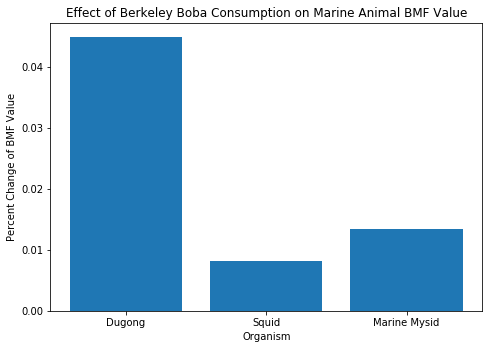

In [91]:
du_az = np.sum(du_a * du_phi * z)/du_phi.dot(z)
sq_az = np.sum(sq_a * sq_phi * z)/sq_phi.dot(z)
th_az = np.sum(th_a * th_phi * z)/th_phi.dot(z)
du_beta = 1 - du_az
sq_beta = 1 - sq_az
th_beta = 1 - th_az
du_bmf = 1/(du_beta + du_gamma)
sq_bmf = 1/(sq_beta + sq_gamma)
th_bmf = 1/(th_beta + th_gamma)

# print(du_beta)
# print(sq_beta)
# print(th_beta)

print("Old Dugong BMF Value: ", du_bmf)
print("Old Squid BMF Value: ", sq_bmf)
print("Old Marine Mysid BMF Value: ", th_bmf)



du_a_new = du_a + lam * delta_gpgp_plastic_conc
sq_a_new = sq_a + lam * delta_gpgp_plastic_conc
th_a_new = th_a + lam * delta_gpgp_plastic_conc

du_az_new = np.sum(du_a_new * du_phi * z)/du_phi.dot(z)
sq_az_new = np.sum(sq_a_new * sq_phi * z)/sq_phi.dot(z)
th_az_new = np.sum(th_a_new * th_phi * z)/th_phi.dot(z)
du_beta_new = 1 - du_az_new
sq_beta_new = 1 - sq_az_new
th_beta_new = 1 - th_az_new
du_bmf_new = 1/(du_beta_new + du_gamma)
sq_bmf_new = 1/(sq_beta_new + sq_gamma)
th_bmf_new = 1/(th_beta_new + th_gamma)

# print(du_beta_new)
# print(sq_beta_new)
# print(th_beta_new)

print("New Dugong BMF Value: ", du_bmf_new)
print("New Squid BMF Value: ", sq_bmf_new)
print("New Marine Mysid BMF Value: ", th_bmf_new)

du_percent_change = (du_bmf_new - du_bmf)/du_bmf * 100
sq_percent_change = (sq_bmf_new - sq_bmf)/sq_bmf * 100
th_percent_change = (th_bmf_new - th_bmf)/th_bmf * 100

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(["Dugong", "Squid", "Marine Mysid"], [du_percent_change, sq_percent_change, th_percent_change])
plt.xlabel("Organism")
plt.ylabel("Percent Change of BMF Value")
plt.title("Effect of Berkeley Boba Consumption on Marine Animal BMF Value")
plt.show()
plt.close()


WOW! While this model should certainly not be taken as accurate, it captures the idea of how one might model microplastics in organisms and how one might convince policymakers and the general public through scientific research—$\textbf{Connecting our personal choices/actions to real-life environmental consequences}$.

# References

[1] https://ourworldindata.org/plastic-pollution#impacts-on-wildlife

[2] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6150694/

[3] https://pubs.acs.org/doi/10.1021/es051800i

[4] https://www.glasssipper.ca/pages/choosing-the-right-straw

[5] https://opa.berkeley.edu/campus-data/uc-berkeley-quick-facts

[6] https://ib.bioninja.com.au/options/untitled/b3-environmental-protection/biomagnification.html

[7] https://www.greenoptimistic.com/how-microplastics-threaten-ocean-life-cycle-20180927/